For this homework we will be exploring a data science job salaries dataset.

The objective is to create a classifier that is able to infer the salary tier (i.e., if the salary is "low", "medium, "high, or any other sort of tiers you want to come up with).

For that then it will be necessary to encode the salary in different categories first.

Remember that you will need to understand the data, clean the data, separate a training and test sets and, finally, test different models with different parameters.

As usual, it is not a hard requirement to work with this dataset. On [Kaggle Datasets](https://www.kaggle.com/datasets) you can search for a dataset of your interesting (hint: remember to filter for datasets that are more suitable for classification problems).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_csv('dataset\\flight_data.csv', sep=',', index_col=0)


In [3]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to all "object" columns
object_columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])


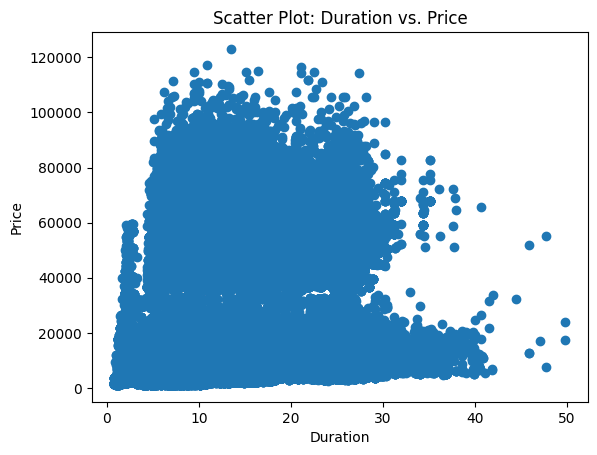

In [4]:
# Data visualisation
plt.scatter(df['duration'], df['price'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Scatter Plot: Duration vs. Price')
plt.show()

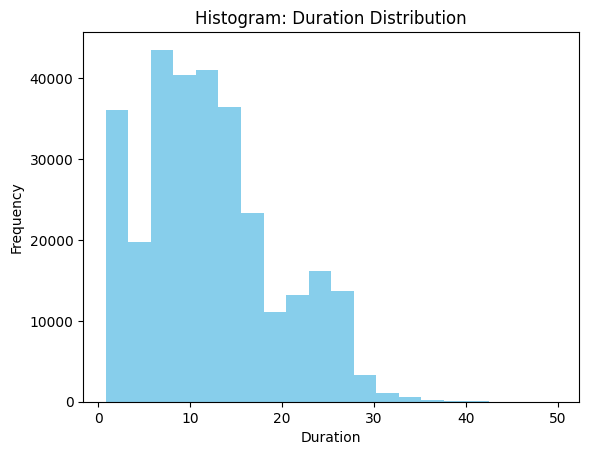

In [5]:
plt.hist(df['duration'], bins=20, color='skyblue')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram: Duration Distribution')
plt.show()

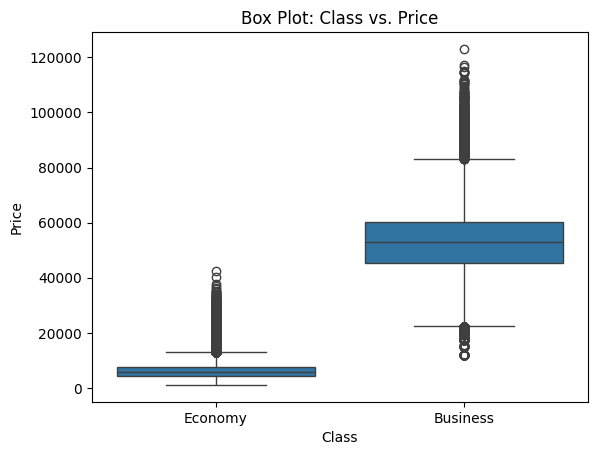

In [6]:
sns.boxplot(x='class', y='price', data=df)
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Box Plot: Class vs. Price')
plt.show()

C:\Users\zolta\AppData\Local\Temp\ipykernel_21004\3169171290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


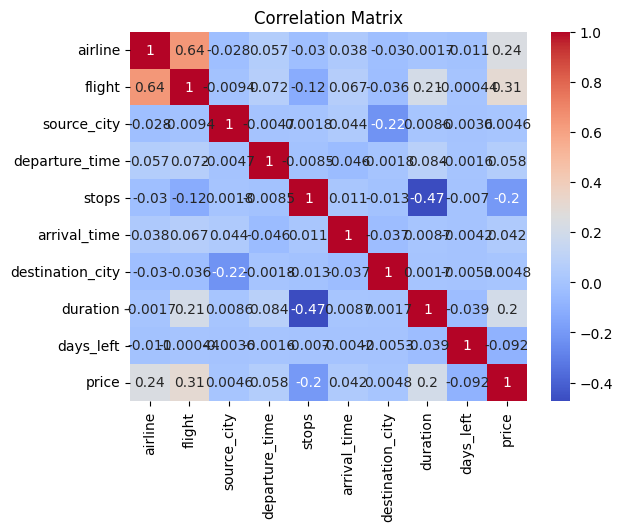

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Convert the "class" column to numerical labels
class_mapping = {'Economy': 0, 'Business': 1, 'First Class': 2}
df['class'] = df['class'].map(class_mapping)

# Split the data into features (X) and the target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Create a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41316
           1       1.00      1.00      1.00     18715

    accuracy                           1.00     60031
   macro avg       1.00      1.00      1.00     60031
weighted avg       1.00      1.00      1.00     60031



Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41316
           1       1.00      1.00      1.00     18715

    accuracy                           1.00     60031
   macro avg       1.00      1.00      1.00     60031
weighted avg       1.00      1.00      1.00     60031



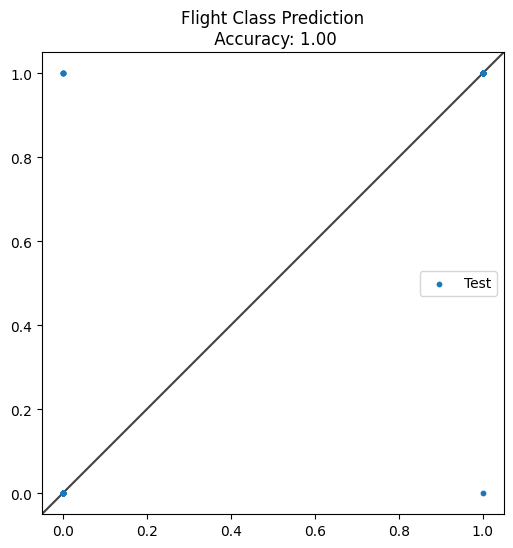

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

# Create a scatter plot to visualize the predictions
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

ax.scatter(y_test, y_pred, s=10, label='Test')

ax.set_title(f'Flight Class Prediction\n Accuracy: {accuracy:.2f}')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# Now plot both limits against each other
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.show()